In [1]:
import pandas as pd
import geopandas as gp
import fiona
import descartes
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
import contextily as ctx
import matplotlib.pylab as pylab
from scipy import ndimage
import numpy as np
import seaborn
import scipy

In [2]:
df = pd.read_csv('OAK.csv')
df.dropna()


,CRIMETYPE,DATETIME,CASENUMBER,DESCRIPTION,POLICEBEAT,ADDRESS,CITY,STATE,Location
0,WEAPONS,04/02/2020 07:42:00 AM,20-017349,CARRY CONCEALED WEAPON IN VEHICLE,19X,1500 E 12TH ST,Oakland,CA,"1500 E 12TH ST\nOakland, CA\n(37.787943, -122...."
1,DOMESTIC VIOLENCE,04/24/2020 08:40:00 PM,20-020861,BATTERY:SPOUSE/EX SPOUSE/DATE/ETC,30Y,2500 73RD AV,Oakland,CA,"2500 73RD AV\nOakland, CA\n(37.765872, -122.17..."
2,VANDALISM,02/04/2020 07:40:00 PM,20-905431,VANDALISM,77X,HOWE ST,Oakland,CA,"HOWE ST\nOakland, CA"
3,VANDALISM,03/08/2020 03:10:00 AM,20-906717,VANDALISM,04X,400 17TH ST,Oakland,CA,"400 17TH ST\nOakland, CA\n(37.806175, -122.268..."
5,KIDNAPPING,05/14/2020 04:00:00 PM,20-024121,KIDNAPPING,24X,3500 LYON AV,Oakland,CA,"3500 LYON AV\nOakland, CA\n(37.787043, -122.21..."
...,...,...,...,...,...,...,...,...,...
16622,VANDALISM,01/30/2020 06:00:00 PM,20-905207,VANDALISM,12X,400 48TH ST,Oakland,CA,"400 48TH ST\nOakland, CA\n(37.834326, -122.258..."
16623,BURG - RESIDENTIAL,02/13/2020 04:44:00 AM,20-008585,BURGLARY-FORCIBLE ENTRY,04X,00 LAKESIDE DR,Oakland,CA,"00 LAKESIDE DR\nOakland, CA"
16624,PETTY THEFT,01/28/2020 11:15:00 AM,20-905148,THEFT,04X,200 17TH ST,Oakland,CA,"200 17TH ST\nOakland, CA\n(37.804776, -122.263..."
16625,STOLEN VEHICLE,02/07/2020 04:00:00 PM,20-008864,VEHICLE THEFT - AUTO,03Y,400 7TH ST,Oakland,CA,"400 7TH ST\nOakland, CA\n(37.799026, -122.272977)"


In [5]:
MAP = gp.read_file('CAOakland1937')

In [6]:
df['Location'] = df.Location.apply(lambda st: st[st.find("(")+1:st.find(")")])

In [7]:

df = df[~df.Location.str.contains('Oakland')]
df = df[~df.Location.str.contains('COSTCO')]
df = df[~df.Location.str.contains('WALGREENS')]


In [8]:
df.dropna()

,CRIMETYPE,DATETIME,CASENUMBER,DESCRIPTION,POLICEBEAT,ADDRESS,CITY,STATE,Location
0,WEAPONS,04/02/2020 07:42:00 AM,20-017349,CARRY CONCEALED WEAPON IN VEHICLE,19X,1500 E 12TH ST,Oakland,CA,"37.787943, -122.245701"
1,DOMESTIC VIOLENCE,04/24/2020 08:40:00 PM,20-020861,BATTERY:SPOUSE/EX SPOUSE/DATE/ETC,30Y,2500 73RD AV,Oakland,CA,"37.765872, -122.176889"
3,VANDALISM,03/08/2020 03:10:00 AM,20-906717,VANDALISM,04X,400 17TH ST,Oakland,CA,"37.806175, -122.268505"
5,KIDNAPPING,05/14/2020 04:00:00 PM,20-024121,KIDNAPPING,24X,3500 LYON AV,Oakland,CA,"37.787043, -122.211972"
6,ARSON,02/18/2020 09:49:00 PM,20-009640,MAL SET/ETC FIRE PROP/ETC,19X,E 12TH ST & 16TH AV,Oakland,CA,"37.787503, -122.24496"
...,...,...,...,...,...,...,...,...,...
16621,VANDALISM,02/13/2020 09:55:00 AM,20-905246,VANDALISM,25X,4000 MACARTHUR BLVD,Oakland,CA,"37.790482, -122.19766"
16622,VANDALISM,01/30/2020 06:00:00 PM,20-905207,VANDALISM,12X,400 48TH ST,Oakland,CA,"37.834326, -122.258959"
16624,PETTY THEFT,01/28/2020 11:15:00 AM,20-905148,THEFT,04X,200 17TH ST,Oakland,CA,"37.804776, -122.263844"
16625,STOLEN VEHICLE,02/07/2020 04:00:00 PM,20-008864,VEHICLE THEFT - AUTO,03Y,400 7TH ST,Oakland,CA,"37.799026, -122.272977"


In [9]:
df[['lat','lon']] = df['Location'].str.split(', ', expand=True).rename(columns={0:'Lat', 1:'Lon'}) 

In [10]:
df.dropna()

,CRIMETYPE,DATETIME,CASENUMBER,DESCRIPTION,POLICEBEAT,ADDRESS,CITY,STATE,Location,lat,lon
0,WEAPONS,04/02/2020 07:42:00 AM,20-017349,CARRY CONCEALED WEAPON IN VEHICLE,19X,1500 E 12TH ST,Oakland,CA,"37.787943, -122.245701",37.787943,-122.245701
1,DOMESTIC VIOLENCE,04/24/2020 08:40:00 PM,20-020861,BATTERY:SPOUSE/EX SPOUSE/DATE/ETC,30Y,2500 73RD AV,Oakland,CA,"37.765872, -122.176889",37.765872,-122.176889
3,VANDALISM,03/08/2020 03:10:00 AM,20-906717,VANDALISM,04X,400 17TH ST,Oakland,CA,"37.806175, -122.268505",37.806175,-122.268505
5,KIDNAPPING,05/14/2020 04:00:00 PM,20-024121,KIDNAPPING,24X,3500 LYON AV,Oakland,CA,"37.787043, -122.211972",37.787043,-122.211972
6,ARSON,02/18/2020 09:49:00 PM,20-009640,MAL SET/ETC FIRE PROP/ETC,19X,E 12TH ST & 16TH AV,Oakland,CA,"37.787503, -122.24496",37.787503,-122.24496
...,...,...,...,...,...,...,...,...,...,...,...
16621,VANDALISM,02/13/2020 09:55:00 AM,20-905246,VANDALISM,25X,4000 MACARTHUR BLVD,Oakland,CA,"37.790482, -122.19766",37.790482,-122.19766
16622,VANDALISM,01/30/2020 06:00:00 PM,20-905207,VANDALISM,12X,400 48TH ST,Oakland,CA,"37.834326, -122.258959",37.834326,-122.258959
16624,PETTY THEFT,01/28/2020 11:15:00 AM,20-905148,THEFT,04X,200 17TH ST,Oakland,CA,"37.804776, -122.263844",37.804776,-122.263844
16625,STOLEN VEHICLE,02/07/2020 04:00:00 PM,20-008864,VEHICLE THEFT - AUTO,03Y,400 7TH ST,Oakland,CA,"37.799026, -122.272977",37.799026,-122.272977


In [11]:
df.lat = df.lat.astype(float)
df.lon = df.lon.astype(float)

In [16]:
geometry = [Point(xy) for xy in zip( df["lon"], df["lat"])]

In [17]:
df = df.dropna()

In [18]:
crs = {'init': 'epsg:4326'}
MAP.crs = crs
geo_df = gp.GeoDataFrame(df,
                        crs=crs,
                        geometry=geometry)
MAP = MAP.to_crs(epsg=3857)
geo_df = geo_df.to_crs(epsg=3857)


In [39]:
def heatmap(d, bins=(10000,10000), smoothing=3, cmap='coolwarm'):
    def getx(pt):
        return pt.coords[0][0]

    def gety(pt):
        return pt.coords[0][1]

    x = list(d.geometry.apply(getx))
    y = list(d.geometry.apply(gety))
    heatmap, xedges, yedges = np.histogram2d(y, x, bins=bins)
    extent = [yedges[0], yedges[-1], xedges[-1], xedges[0]]

    logheatmap = np.log(heatmap)
    logheatmap[np.isneginf(logheatmap)] = 0
    logheatmap = ndimage.filters.gaussian_filter(logheatmap, smoothing, mode='nearest')
    
    plt.imshow(logheatmap, cmap=cmap, extent=extent,alpha = 0.5)
    
    plt.gca()

/Users/johnthe/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


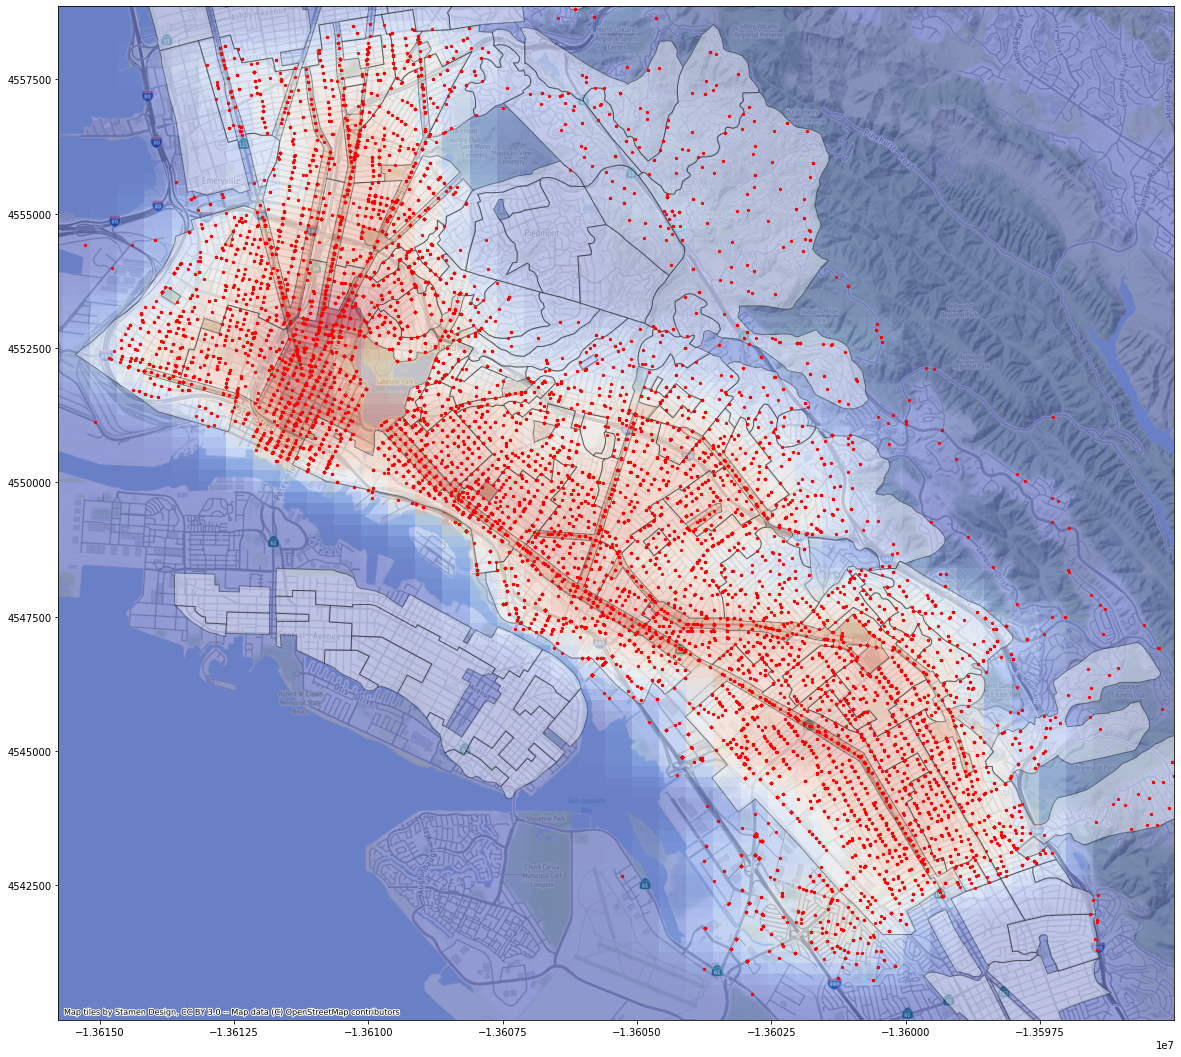

In [48]:
fig,ax = plt.subplots(figsize = (20,20))
ax.set_aspect('equal')
MAP.plot(ax = ax,alpha=0.4,edgecolor="black",facecolor="white")
ctx.add_basemap(ax,zoom = 14)
heatmap(geo_df,  smoothing=1.5)
geo_df.plot(ax=ax, marker='o', color='red', markersize=5)
ax.set_xlim(-13615768.5742512, -13595000.34427671)
ax.set_ylim(4540000.58147067, 4558858.04711864)
plt.savefig('bg-masthead.jpg')